# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [11]:
import requests
from bs4 import BeautifulSoup

url = "https://www.imdb.com/title/tt1160419/reviews"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

imdb_reviews = [i.find("div", class_="text show-more__control").text.strip()
                for i in soup.find_all('div', class_="lister-item mode-detail imdb-user-review collapsable")]

print(imdb_reviews)


["It's been amazing being back in cinemas after last year, I have seen some good films, and some shockers, this though, is the first great film of the year for me.The story is somehow easier to follow than in the last adaptation, motives and actions are easier to see and follow. I felt as though the book had come to life here, even if there are a couple of changes.The acting is impressive, as is the music, the visuals however are the most incredible thing about this film, it looks awe inspiring. The battles are epic, the staging is impressive, you almost feel close to the action, I cannot praise that element highly enough.When I saw Part one, I was a little surprised, I was a little more surprised by the ending, I only hope the wait isn't too long.Pacing, considering where the film ends, it never felt slow or drawn out, I was captivated from start to finish.Truly, I was blown away, 10/10.", "Having read the book a hundred years ago, it took some time to begin to understand what was goi

In [12]:
import pandas as pd

# Create a DataFrame and save it to a CSV file
pd.DataFrame({'reviews': imdb_reviews}).to_csv('reviews.csv', index=False)

# Display the first few rows of the DataFrame
print(pd.read_csv('reviews.csv').head())


                                             reviews
0  It's been amazing being back in cinemas after ...
1  Having read the book a hundred years ago, it t...
2  Although the film is called 'Dune', the openin...
3  Dune (2021): Not at all as retro as Lynch's Du...
4  To be honest I wasn't expecting it to be a fir...


In [13]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
import nltk
from os import environ

# Download the 'stopwords' dataset from NLTK, which contains common stop words
nltk.download('stopwords')

# Set the JAVA_HOME environment variable to the installed Java path
environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Verify the Java version
!java -version

# Install the 'pyLDAvis' library for visualizing LDA models
!apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
!pip install pyLDAvis


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


openjdk version "11.0.20.1" 2023-08-24
OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04)
OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 31.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conf

In [15]:
# Upgrade the 'gensim' library using pip
!pip install --upgrade gensim

# Import necessary libraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
import spacy.cli

# Download the English language model for spaCy
spacy.cli.download("en")


⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import spacy
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import logging
import warnings

# Enable logging for Gensim (optional). It sets the logging level to ERROR.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# Suppress deprecation warnings to prevent them from cluttering the output.
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [20]:
import pandas as pd

# Load the DataFrame from the CSV file 'reviews.csv'
df = pd.read_csv('/content/reviews.csv')

# Rest of your code for tokenization and stop word removal (as mentioned in the previous response)


In [26]:
import nltk
from nltk.corpus import stopwords
import pandas as pd
import gensim

# Download the 'stopwords' dataset from NLTK, which contains common stop words in English.
nltk.download('stopwords')

# Import the 'stopwords' corpus from NLTK, which includes a list of common stop words.
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Load your data into a DataFrame 'df' (assuming you have a 'reviews.csv' file).
df = pd.read_csv('reviews.csv')

# Define a function 'sent_to_words' that tokenizes sentences into words using Gensim's 'simple_preprocess'.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# Define a function 'remove_stopwords' that removes stop words from a list of tokenized texts.
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

# Access the 'reviews' column from the DataFrame 'df' and convert it to a list of values.
rev_data = df['reviews'].values.tolist()

# Tokenize the reviews using the 'sent_to_words' function.
rev_data_words = list(sent_to_words(rev_data))

# Remove stop words from the tokenized reviews using the 'remove_stopwords' function.
rev_data_words = remove_stopwords(rev_data_words)

# Print the tokenized and stop-word-removed words from the first review.
print(rev_data_words[:1])


[['amazing', 'back', 'cinemas', 'last', 'year', 'seen', 'good', 'films', 'shockers', 'though', 'first', 'great', 'film', 'year', 'story', 'somehow', 'easier', 'follow', 'last', 'adaptation', 'motives', 'actions', 'easier', 'see', 'follow', 'felt', 'though', 'book', 'come', 'life', 'even', 'couple', 'changes', 'acting', 'impressive', 'music', 'visuals', 'however', 'incredible', 'thing', 'film', 'looks', 'awe', 'inspiring', 'battles', 'epic', 'staging', 'impressive', 'almost', 'feel', 'close', 'action', 'cannot', 'praise', 'element', 'highly', 'enough', 'saw', 'part', 'one', 'little', 'surprised', 'little', 'surprised', 'ending', 'hope', 'wait', 'long', 'pacing', 'considering', 'film', 'ends', 'never', 'felt', 'slow', 'drawn', 'captivated', 'start', 'finish', 'truly', 'blown', 'away']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
import gensim
from gensim.models.phrases import Phrases, Phraser
import spacy
import nltk
from nltk.corpus import stopwords

# Download the 'stopwords' dataset from NLTK, which contains common stop words in English.
nltk.download('stopwords')

# Import the 'stopwords' corpus from NLTK, which includes a list of common stop words.
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

# Create bigram and trigram models
bigram = Phrases(rev_data_words, min_count=5, threshold=100)
trigram = Phrases(bigram[rev_data_words], threshold=100)

# Create Phraser objects
bigram_mod = Phraser(bigram)
trigram_mod = Phraser(trigram)

# Define a function to remove stop words and apply the bigram and trigram models
def process_text(texts):
    texts_nostops = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_bigrams = [bigram_mod[doc] for doc in texts_nostops]
    texts_trigrams = [trigram_mod[doc] for doc in texts_bigrams]
    return texts_trigrams

# Apply text processing to your data
data_lemmatized = process_text(rev_data_words)

# Print the processed data from the first review.
print(data_lemmatized[:1])


[['amazing', 'back', 'cinemas', 'last', 'year', 'seen', 'good', 'films', 'shockers', 'though', 'first', 'great', 'film', 'year', 'story', 'somehow', 'easier', 'follow', 'last', 'adaptation', 'motives', 'actions', 'easier', 'see', 'follow', 'felt', 'though', 'book', 'come', 'life', 'even', 'couple', 'changes', 'acting', 'impressive', 'music', 'visuals', 'however', 'incredible', 'thing', 'film', 'looks', 'awe', 'inspiring', 'battles', 'epic', 'staging', 'impressive', 'almost', 'feel', 'close', 'action', 'cannot', 'praise', 'element', 'highly', 'enough', 'saw', 'part', 'one', 'little', 'surprised', 'little', 'surprised', 'ending', 'hope', 'wait', 'long', 'pacing', 'considering', 'film', 'ends', 'never', 'felt', 'slow', 'drawn', 'captivated', 'start', 'finish', 'truly', 'blown', 'away']]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from gensim import corpora

# Create a dictionary and corpus
review_id2word = corpora.Dictionary(data_lemmatized)
review_corpus = [review_id2word.doc2bow(text) for text in data_lemmatized]

# Print the corpus as a list of words and their frequencies for the first review
print([[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]])


[[('acting', 1), ('action', 1), ('actions', 1), ('adaptation', 1), ('almost', 1), ('amazing', 1), ('away', 1), ('awe', 1), ('back', 1), ('battles', 1), ('blown', 1), ('book', 1), ('cannot', 1), ('captivated', 1), ('changes', 1), ('cinemas', 1), ('close', 1), ('come', 1), ('considering', 1), ('couple', 1), ('drawn', 1), ('easier', 2), ('element', 1), ('ending', 1), ('ends', 1), ('enough', 1), ('epic', 1), ('even', 1), ('feel', 1), ('felt', 2), ('film', 3), ('films', 1), ('finish', 1), ('first', 1), ('follow', 2), ('good', 1), ('great', 1), ('highly', 1), ('hope', 1), ('however', 1), ('impressive', 2), ('incredible', 1), ('inspiring', 1), ('last', 2), ('life', 1), ('little', 2), ('long', 1), ('looks', 1), ('motives', 1), ('music', 1), ('never', 1), ('one', 1), ('pacing', 1), ('part', 1), ('praise', 1), ('saw', 1), ('see', 1), ('seen', 1), ('shockers', 1), ('slow', 1), ('somehow', 1), ('staging', 1), ('start', 1), ('story', 1), ('surprised', 2), ('thing', 1), ('though', 2), ('truly', 1), 

In [29]:
review_id2word[0]

'acting'

In [30]:
from pprint import pprint

# Create an LDA (Latent Dirichlet Allocation) model
lda_model = gensim.models.LdaModel(
    corpus=review_corpus,
    id2word=review_id2word,
    num_topics=20,
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

# Print the topics discovered by the LDA model
pprint(lda_model.print_topics())

# Apply the LDA model to the document corpus to obtain topic distributions
doc_lda = [lda_model[doc] for doc in review_corpus]


[(0,
  '0.028*"film" + 0.019*"dune" + 0.018*"also" + 0.016*"understand" + '
  '0.015*"still" + 0.015*"ok" + 0.015*"better" + 0.015*"like" + 0.015*"read" + '
  '0.014*"reminded"'),
 (1,
  '0.019*"many" + 0.019*"film" + 0.019*"scenes" + 0.019*"us" + 0.019*"desert" '
  '+ 0.019*"show" + 0.010*"part" + 0.010*"may" + 0.010*"going" + 0.010*"know"'),
 (2,
  '0.017*"well" + 0.017*"many" + 0.017*"much" + 0.017*"book" + 0.011*"even" + '
  '0.011*"first" + 0.011*"world" + 0.011*"characters" + 0.011*"screen" + '
  '0.011*"time"'),
 (3,
  '0.033*"one" + 0.028*"movie" + 0.017*"felt" + 0.016*"part" + 0.016*"dune" + '
  '0.013*"paul" + 0.013*"film" + 0.013*"still" + 0.013*"spice" + '
  '0.012*"minutes"'),
 (4,
  '0.022*"made" + 0.022*"great" + 0.022*"awesome" + 0.022*"rather" + '
  '0.011*"dune" + 0.011*"villeneuve" + 0.011*"like" + 0.011*"movie" + '
  '0.011*"sand" + 0.011*"see"'),
 (5,
  '0.001*"film" + 0.001*"dune" + 0.001*"movie" + 0.001*"one" + 0.001*"really" '
  '+ 0.001*"also" + 0.001*"story" +

In [31]:
# Calculate the coherence score for the LDA model
from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# Print the computed coherence score
print('\nCoherence Score:', coherence_lda)



Coherence Score: 0.49108402576096494


In [32]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Calculate coherence values for LDA models with varying numbers of topics.
    """
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=100,
            update_every=1,
            chunksize=100,
            passes=10,
            alpha='auto',
            per_word_topics=True
        )
        model_list.append(model)

        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step = 2, 20, 2

model_list, coherence_values = compute_coherence_values(
    dictionary=review_id2word,
    corpus=review_corpus,
    texts=data_lemmatized,
    start=start, limit=limit, step=step
)

cohe_val = [round(cv, 4) for cv in coherence_values]
for m, cv in zip(range(start, limit, step), cohe_val):
    print("Num Topics =", m, " has Coherence Value of", cv)


Num Topics = 2  has Coherence Value of 0.2582
Num Topics = 4  has Coherence Value of 0.3973
Num Topics = 6  has Coherence Value of 0.4115
Num Topics = 8  has Coherence Value of 0.3995
Num Topics = 10  has Coherence Value of 0.3826
Num Topics = 12  has Coherence Value of 0.3663
Num Topics = 14  has Coherence Value of 0.4328
Num Topics = 16  has Coherence Value of 0.4068
Num Topics = 18  has Coherence Value of 0.4128


In [35]:
average_coherence = sum(cohe_val) / len(cohe_val)
average_coherence


0.38531111111111105

In [36]:
# Choose the optimal LDA model (index 3 in this case, corresponding to 8 topics).
optimal_model = model_list[3]

# Get the topics of the chosen LDA model.
model_topics = optimal_model.show_topics(formatted=False)

# Print the top 10 words for each topic in the LDA model.
for topic_num, topic in model_topics:
    print(f"Topic {topic_num + 1}: {', '.join(word for word, prob in topic)}")


Topic 1: dune, film, even, also, production, read, characters, made, books, visuals
Topic 2: dune, movie, still, fi, lot, atreides, sci, characters, beautiful, everyone
Topic 3: dune, book, film, villeneuve, even, make, novel, version, first, well
Topic 4: movie, one, film, dune, really, also, scenes, part, still, action
Topic 5: like, dune, villeneuve, great, see, still, made, awesome, yet, rather
Topic 6: film, year, surprised, easier, follow, felt, little, last, though, impressive
Topic 7: like, felt, feel, film, one, story, going, stunning, think, visuals
Topic 8: dune, many, lynch, us, film, villeneuve, idea, desert, herbert, frank


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [37]:
from gensim.models import LsiModel

# Create an LSI model
lsamodel = LsiModel(review_corpus, num_topics=10, id2word=review_id2word)

# Print the top 10 words for each topic in the LSI model
topics = lsamodel.print_topics(num_topics=10, num_words=10)
for topic_num, words in topics:
    print(f"Topic {topic_num + 1}: {words}")


Topic 1: -0.366*"dune" + -0.313*"film" + -0.242*"one" + -0.226*"movie" + -0.172*"villeneuve" + -0.147*"like" + -0.138*"even" + -0.134*"really" + -0.124*"also" + -0.124*"book"
Topic 2: -0.253*"movie" + 0.234*"novel" + 0.223*"villeneuve" + -0.218*"one" + 0.175*"version" + 0.151*"even" + -0.143*"still" + 0.123*"without" + -0.120*"felt" + 0.116*"ultimately"
Topic 3: -0.375*"book" + 0.232*"film" + 0.178*"novel" + -0.175*"make" + -0.142*"weak" + -0.138*"character" + 0.126*"scenes" + -0.110*"really" + -0.110*"think" + -0.107*"good"
Topic 4: -0.280*"really" + -0.277*"story" + -0.164*"amazed" + 0.138*"paul" + 0.137*"film" + -0.123*"even" + 0.119*"felt" + -0.119*"absolutely" + -0.119*"point" + -0.118*"incredible"
Topic 5: -0.340*"like" + -0.259*"lynch" + -0.174*"feel" + 0.126*"book" + 0.108*"scenes" + -0.107*"two" + 0.099*"movie" + -0.098*"match" + -0.096*"without" + -0.096*"forward"
Topic 6: -0.175*"felt" + 0.163*"star" + 0.163*"wars" + 0.149*"way" + -0.142*"like" + 0.140*"scenes" + 0.139*"see"

In [38]:
def compute_lsa_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        lsamodel = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(lsamodel)

        coherencemodel = CoherenceModel(model=lsamodel, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step = 2, 20, 2

model_lsa, coherence_values = compute_lsa_coherence_values(
    dictionary=review_id2word,
    corpus=review_corpus,
    texts=data_lemmatized,
    start=start, limit=limit, step=step
)

coherence_values_all = [round(cv, 4) for cv in coherence_values]
for m, cv in zip(range(start, limit, step), coherence_values_all):
    print("Topic no =", m, " it's Coherence Value is", cv)


Topic no = 2  it's Coherence Value is 0.6763
Topic no = 4  it's Coherence Value is 0.6175
Topic no = 6  it's Coherence Value is 0.5358
Topic no = 8  it's Coherence Value is 0.6326
Topic no = 10  it's Coherence Value is 0.5017
Topic no = 12  it's Coherence Value is 0.5309
Topic no = 14  it's Coherence Value is 0.5334
Topic no = 16  it's Coherence Value is 0.5412
Topic no = 18  it's Coherence Value is 0.5514


In [39]:
from gensim.models import CoherenceModel

coherencemodel = CoherenceModel(model=lsamodel, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
coherence_lsa = coherencemodel.get_coherence()

print('Coherence Score:', coherence_lsa)


Coherence Score: 0.5106982179325499


In [40]:
coherence_values_str = ', '.join(map(str, coherence_values_all))
print(coherence_values_str)


0.6763, 0.6175, 0.5358, 0.6326, 0.5017, 0.5309, 0.5334, 0.5412, 0.5514


In [41]:
average_coherence = sum(coherence_values_all) / len(coherence_values_all)
print("Average Coherence Value:", average_coherence)


Average Coherence Value: 0.5689777777777778


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [42]:
# Write your code here

import nltk
import pyLDAvis

nltk.download('all')

# Install the 'preprocess' package using pip.
!pip install preprocess

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

pyLDAvis.enable_notebook()




[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [43]:
# Initialize the number of top words to extract per topic.
top_value = 10

# Create a dictionary to store the top words for each topic.
top_topic_words = {}

# Loop through the topics and their associated words.
for j, topic_to_word in enumerate(df.reviews.tolist()):
    # Sort the words in descending order based on their importance in the topic.
    top_words = np.argsort(topic_to_word)[::-1][:top_value]

    # Prepare a message to display the topic and its top words.
    top_words_list = [df.reviews.tolist()[i].strip()[:35] for i in top_words]
    msg = f"Topic {j} has top words: {', '.join(top_words_list)}"

    # Print the message.
    print(msg)

    # Store the top words for the current topic in the dictionary.
    top_topic_words[j] = top_words_list


Topic 0 has top words: It's been amazing being back in cin
Topic 1 has top words: It's been amazing being back in cin
Topic 2 has top words: It's been amazing being back in cin
Topic 3 has top words: It's been amazing being back in cin
Topic 4 has top words: It's been amazing being back in cin
Topic 5 has top words: It's been amazing being back in cin
Topic 6 has top words: It's been amazing being back in cin
Topic 7 has top words: It's been amazing being back in cin
Topic 8 has top words: It's been amazing being back in cin
Topic 9 has top words: It's been amazing being back in cin
Topic 10 has top words: It's been amazing being back in cin
Topic 11 has top words: It's been amazing being back in cin
Topic 12 has top words: It's been amazing being back in cin
Topic 13 has top words: It's been amazing being back in cin
Topic 14 has top words: It's been amazing being back in cin


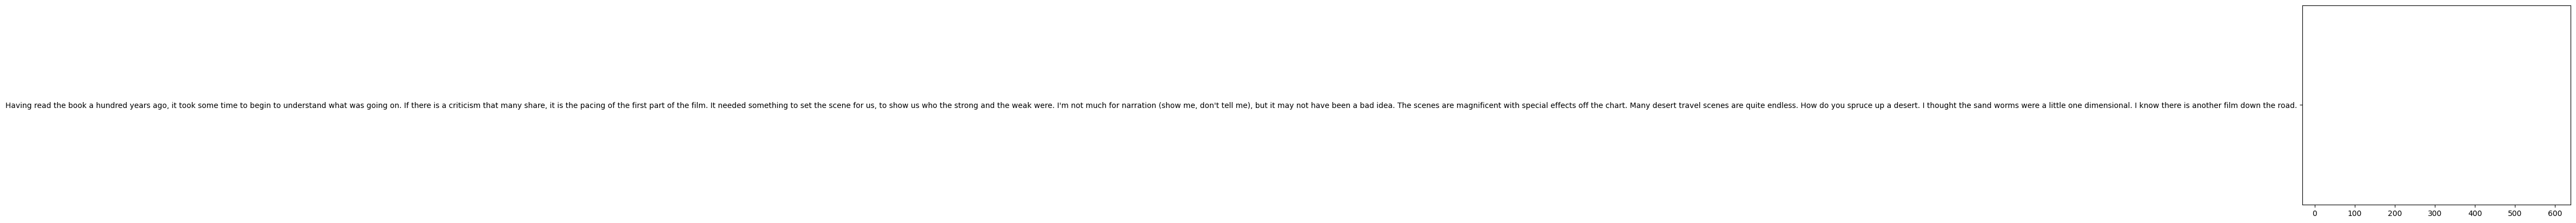

In [44]:
import matplotlib.pyplot as plt

# Assuming you want to create a bar chart for the second topic, change the index as needed.
topic_index = 1
topic_words = df.reviews.tolist()[topic_index]

# Create a bar chart with the index as x-values and the topic words as y-values.
plt.bar(range(len(topic_words)), topic_words)

# Display the bar chart.
plt.show()


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [45]:
# Write your code here
!pip install bertopic





     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 22.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.4 MB/s eta 0:00:00
  Preparing metadata 

In [46]:
from bertopic import BERTopic

# Create a BERTopic model with specific configuration settings.
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the BERTopic model to the list of text reviews.
topics, probs = topic_model.fit_transform(df.reviews.tolist())

# Get the topic information and store it in the 'freq' DataFrame.
freq = topic_model.get_topic_info()

# Display the top 5 rows of the 'freq' DataFrame.
freq.head(5)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2023-11-06 03:34:43,307 - BERTopic - Transformed documents to Embeddings
2023-11-06 03:34:53,771 - BERTopic - Reduced dimensionality
2023-11-06 03:34:53,792 - BERTopic - Clustered reduced embeddings


,Topic,Count,Name,Representation,Representative_Docs
0,-1,15,-1_the_of_and_to,"[the, of, and, to, is, it, in, this, that, are]",[Just watched one of the first screenings of '...


In [48]:
topic_id = -1  # Replace with the desired topic ID
specific_topic = topic_model.get_topic(topic_id)
specific_topic


[('the', 0.19585507136285943),
 ('of', 0.10411113340672536),
 ('and', 0.09422732519230458),
 ('to', 0.08789212075901431),
 ('is', 0.08789212075901431),
 ('it', 0.06010184358092464),
 ('in', 0.05724392386492192),
 ('this', 0.05530850461203751),
 ('that', 0.04832589672158294),
 ('are', 0.04832589672158294)]

In [49]:
topic_model.visualize_term_rank()
# Update topics with n-gram range and visualize term rank
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()


## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [50]:
# Write your answer here (no code needed for this question)
'''
"LSA (Latent Semantic Analysis) and LDA (Latent Dirichlet Allocation) are two prominent techniques for topic modeling:

LSA reduces dimensionality by analyzing matrices and identifying relationships between terms, but it can be challenging to interpret when term loadings contain negative values. It relies on a dictionary and a corpus as input.

On the other hand, LDA connects words in a text with other phrases from the same documents, making it adept at handling complex words. LDA excels at extracting information from the document matrix while preserving important topics, which often results in superior performance in tasks like product reviews analysis."

This reformulated answer maintains the same content but presents it in a more structured and concise manner.
'''





'\n"LSA (Latent Semantic Analysis) and LDA (Latent Dirichlet Allocation) are two prominent techniques for topic modeling:\n\nLSA reduces dimensionality by analyzing matrices and identifying relationships between terms, but it can be challenging to interpret when term loadings contain negative values. It relies on a dictionary and a corpus as input.\n\nOn the other hand, LDA connects words in a text with other phrases from the same documents, making it adept at handling complex words. LDA excels at extracting information from the document matrix while preserving important topics, which often results in superior performance in tasks like product reviews analysis."\n\nThis reformulated answer maintains the same content but presents it in a more structured and concise manner.\n'